In [193]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import calendar

In [26]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

THEGaeideuk


In [19]:
#1
cctv = pd.read_csv("data/cctv_seoul.csv")
def cdivi(x):
    return x['CCTV수']/x['인구수']*100
cctv['cctv비율'] = cctv.apply(cdivi,axis=1)
def odivi(x):
    return x['고령자']/x['인구수']*100
cctv['노인비율'] = cctv.apply(odivi,axis=1)

display(cctv.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       310 non-null    int64 
 1   1       310 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


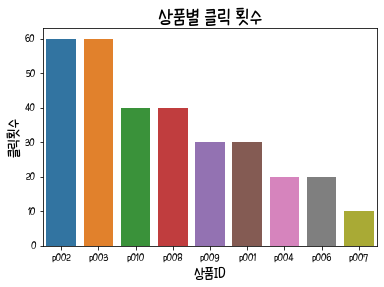

In [251]:
#2
product = pd.read_csv('data/product_click_new.log',header=None,sep=" ")
product = pd.DataFrame(product)
product.info()
sns.countplot(x=1, dodge=False, data=product,order=product[1].value_counts().index)       
plt.ylabel('클릭횟수', size=15)
plt.xlabel('상품ID', size=15)
plt.title('상품별 클릭 횟수', size=20)
plt.savefig("output/hw7.png")

In [291]:
#2-2
product[2] = pd.to_datetime(product[0],format='%Y%m%d%H%M')
product['year'] = product[2].dt.year
product['month'] =product[2].dt.month
product['day'] =product[2].dt.day
product['hour'] =product[2].dt.hour
product['minute'] =product[2].dt.minute
daystring=['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
product[3] = product.apply(lambda x: datetime.date(x['year'], x['month'], x['day']).weekday(),axis=1)
product[4] = product.apply(lambda x: daystring[x[3]],axis=1)
date = product[4].value_counts()
date = pd.DataFrame(date)
print(product)
print(date.index[0])
print('클릭 수가 제일 많은 요일은',date.index[0],'입니다.')

                0     1                   2  year  month  day  hour  minute  \
0    201612120944  p001 2016-12-12 09:44:00  2016     12   12     9      44   
1    201612120944  p003 2016-12-12 09:44:00  2016     12   12     9      44   
2    201612120944  p003 2016-12-12 09:44:00  2016     12   12     9      44   
3    201612120945  p008 2016-12-12 09:45:00  2016     12   12     9      45   
4    201612121052  p008 2016-12-12 10:52:00  2016     12   12    10      52   
..            ...   ...                 ...   ...    ...  ...   ...     ...   
305  201612141110  p007 2016-12-14 11:10:00  2016     12   14    11      10   
306  201612141111  p002 2016-12-14 11:11:00  2016     12   14    11      11   
307  201612141139  p003 2016-12-14 11:39:00  2016     12   14    11      39   
308  201612141139  p010 2016-12-14 11:39:00  2016     12   14    11      39   
309  201612141139  p009 2016-12-14 11:39:00  2016     12   14    11      39   

     3    4  
0    0  월요일  
1    0  월요일  
2    0  월

In [293]:
#2-3
hour = product['hour'].value_counts()
print(hour)
hour = product['hour'].value_counts().index[0]
print(f"{hour}시와 {hour+1}시 사이에 제일 많이 클릭했습니다.")

11    120
9     110
10     80
Name: hour, dtype: int64
11시와 12시 사이에 제일 많이 클릭했습니다.


In [328]:
#3-1
emp = pd.read_csv('data/emp.csv')
emp.groupby('deptno')['sal'].sum()

deptno
10     8750
20    10875
30     9400
Name: sal, dtype: int64

In [330]:
#3-2
display(emp.groupby('job')['sal'].sum())
#3-3
emp.groupby(['deptno','job'])['sal','hiredate'].max()

job
ANALYST      6000
CLERK        4150
MANAGER      8275
PRESIDENT    5000
SALESMAN     5600
Name: sal, dtype: int64

<ipython-input-330-326e1adbfe1f>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emp.groupby(['deptno','job'])['sal','hiredate'].max()


sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1982-12-08
       CLERK      1100  1983-01-12
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1984-10-08

In [ ]:
#3-4